In [140]:
import timeit
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
#Đọc dữ liệu:
data = pd.read_csv('housing.csv')

#Mô tả sơ lược về dữ liệu:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

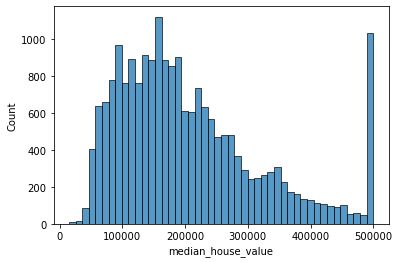

In [142]:
#Câu hỏi 1: 
sns.histplot(data['median_house_value'])

In [143]:
#Câu hỏi 2:
numline = len(data)
print('Tong so dong la: ',numline)

numcolums = len(data.columns)
print ('Co', numcolums, 'thuoc tinh: ')
print('Ten cac thuoc tinh la: ')
data.columns

Tong so dong la:  20640
Co 10 thuoc tinh: 
Ten cac thuoc tinh la: 


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [144]:
#Câu hỏi 3:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

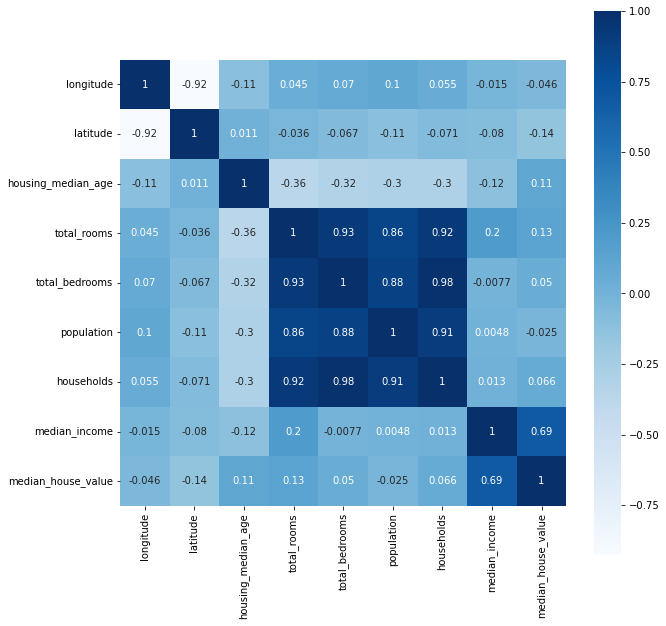

In [145]:
#Kiểm tra sự phụ thuộc của từng thuộc tính
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

In [146]:
#Câu hỏi 5:
#Lấy thuộc tính alcohol và quality
X = data['median_income']
y = data['median_house_value']

In [147]:
#Câu hỏi 6:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [148]:
#Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

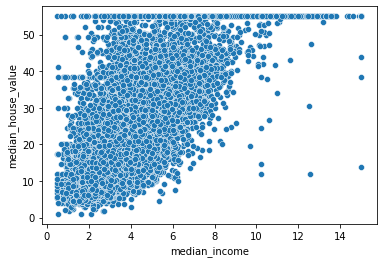

In [149]:
#Câu hỏi 4:
data_visualize = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")

In [150]:
# Huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện: 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression()

In [151]:
X_train.shape

(16512,)

In [152]:
y_train_transformed.shape

(16512,)

In [153]:
#Câu hỏi 7:
#MSE
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test.values.reshape(-1,1))

mean_squared_error(y_test_transformed, y_pred, squared = True)

87.90581581394004

In [154]:
#RMSE
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test.values.reshape(-1,1))

mean_squared_error(y_test_transformed, y_pred, squared = False)

9.37581014173922

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

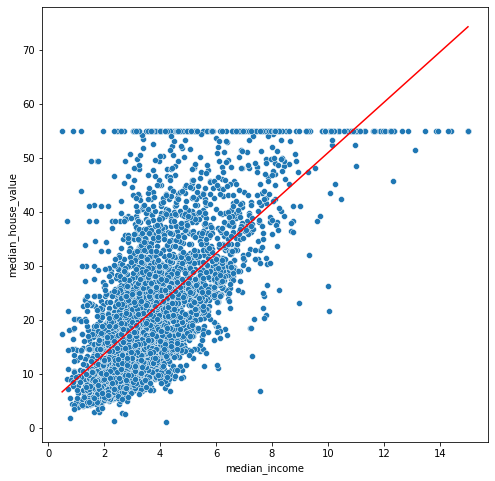

In [155]:
#Mô phỏng đường hồi quy trên dữ liệu dự đoán:
#Trực quan hóa kết quả dự đoán và kết quả thật
test_true = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.values.reshape(-1), 'median_house_value': y_pred})

fig= plt.figure(figsize=(8,8))

#Kết quả dự đoán của mô hình (Đường thẳng)
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')

#Kết quả thực sự (Scatter plot)
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")

In [156]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [157]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []
avg_score=[]
for train_index, test_index in kf.split(X, y_transformed):
    
 X_train = X.values[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
    
 X_test = X.values[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
    
 model = LinearRegression()
 model.fit(X_train, y_train)
    
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse.append(result)

In [158]:
avg_mse

[87.90581581394004,
 85.29054554832335,
 89.3728387363547,
 89.30774651736782,
 87.52453948479425,
 85.60979878870158,
 86.3045034115234,
 88.07837550250288,
 89.67777041636644,
 85.792519146726]

In [159]:
np.mean(np.array(avg_mse))

87.48644533666005

In [160]:
#BÀI 2:
#Lấy thuộc tính alcohol và quality

X2 = data['total_bedrooms']
y2 = data['median_house_value']

In [161]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')

X_processed = imp.fit_transform(X2.values.reshape(-1,1)).reshape(-1)

In [162]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X_processed, y2, test_size=0.2, random_state = 42)

In [163]:
#Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y2_train_transformed = sc.fit_transform(y2_train.values.reshape(-1,1)).reshape(-1)
y2_test_transformed = sc.fit_transform(y2_test.values.reshape(-1,1)).reshape(-1)

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

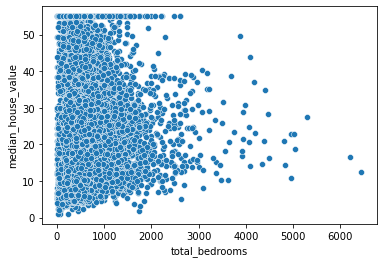

In [164]:
data_visualize = pd.DataFrame({"total_bedrooms": X2_train, "median_house_value": y2_train_transformed})

sns.scatterplot(data=data_visualize, x="total_bedrooms", y="median_house_value")

In [165]:
#Huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện: 

from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X2_train.reshape(-1,1), y2_train_transformed)

LinearRegression()

In [166]:
X2_train.shape

(16512,)

In [167]:
y2_train_transformed.shape

(16512,)

In [168]:
#MSE

from sklearn.metrics import mean_squared_error

y2_pred = model2.predict(X2_test.reshape(-1,1))

mean_squared_error(y2_test_transformed, y2_pred, squared = True)

161.98877034272647

In [ ]:
#Mô phỏng đường hồi quy trên dữ liệu dự đoán:

#Trực quan hóa kết quả dự đoán và kết quả thật

test_true2 = pd.DataFrame({'total_bedrooms': X2_test.reshape(-1), 'median_house_value': y2_test_transformed})
test_pred2 = pd.DataFrame({'total_bedrooms': X2_test.reshape(-1), 'median_house_value': y2_pred})

fig= plt.figure(figsize=(8,8))

#Kết quả dự đoán của mô hình (Đường thẳng)
sns.lineplot(data=test_pred2, x="total_bedrooms", y="median_house_value", color='red')

#Kết quả thực sự (Scatter plot)
sns.scatterplot(data=test_true2, x="total_bedrooms", y="median_house_value")

In [ ]:
#RMSE

from sklearn.metrics import mean_squared_error

y2_pred = model2.predict(X2_test.reshape(-1,1))

mean_squared_error(y2_test_transformed, y2_pred, squared = False)

In [ ]:
#Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y2_transformed = sc.fit_transform(y2.values.reshape(-1,1)).reshape(-1)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

avg_mse2 = []
avg_score2=[]

for train_index, test_index in kf.split(X_processed, y2_transformed):
    
 X2_train = X_processed[train_index].reshape(-1,1)
 y2_train = y2_transformed[train_index]
    
 X2_test = X_processed[test_index].reshape(-1,1)
 y2_test = y2_transformed[test_index]
    
 model = LinearRegression()
 model.fit(X2_train, y2_train)
    
 y_pred2 = model.predict(X2_test)
 b=model.score(X2_test, y2_test)
    
 avg_score2.append(b)
 result = mean_squared_error(y2_test, y_pred2, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse2.append(result)

In [ ]:
avg_mse2

In [ ]:
np.mean(np.array(avg_mse2))

In [ ]:
#Khi dự đoán bằng thuộc tính total_bedrooms, 
#giá trị sai số bình phương trung bình (MSE) và RMSE cao hơn so với khi dự đoán bằng thuộc tính median_income

In [ ]:
#BÀI 3:

features = ["total_bedrooms", "median_income"]

In [ ]:
X3 = data[features]
y3 = data['median_house_value']
X3.head()

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')

X_processed3 = imp.fit_transform(X3)

In [ ]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X_processed3, y3, test_size=0.2, random_state = 42)

In [ ]:
#Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y3_train_transformed = sc.fit_transform(y3_train.values.reshape(-1,1)).reshape(-1)
y3_test_transformed = sc.fit_transform(y3_test.values.reshape(-1,1)).reshape(-1)

In [ ]:
sns.jointplot(data=X3, x="total_bedrooms", y="median_income", color="blue")

In [ ]:
#Huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện: 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X3_train, y3_train_transformed)

In [ ]:
X3_train.shape

In [ ]:
y3_train_transformed.shape

In [ ]:
#MSE

from sklearn.metrics import mean_squared_error

y_pred3 = model.predict(X3_test)

mean_squared_error(y3_test_transformed, y_pred3, squared = True)

In [ ]:
#Biểu đồ 3D mô phỏng:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X3.total_bedrooms, X3.median_income, y3, linewidths = 1, alpha = .7, edgecolor = 'k')

plt.show()

In [ ]:
#RMSE

from sklearn.metrics import mean_squared_error

y_pred3 = model.predict(X3_test)

mean_squared_error(y3_test_transformed, y_pred3, squared = False)

In [ ]:
#Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y3_transformed = sc.fit_transform(y3.values.reshape(-1,1)).reshape(-1)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse3 = []
avg_score3=[]

for train_index, test_index in kf.split(X_processed3, y3_transformed):
    
 X3_train = X_processed3[train_index]
 y3_train = y3_transformed[train_index]
    
 X3_test = X_processed3[test_index]
 y3_test = y3_transformed[test_index]
    
 model = LinearRegression()
 model.fit(X3_train, y3_train)
    
 y_pred3 = model.predict(X3_test)
 c=model.score(X3_test, y3_test)
    
 avg_score3.append(b)
 result = mean_squared_error(y3_test, y_pred3, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse3.append(result)

In [ ]:
avg_mse3

In [ ]:
np.mean(np.array(avg_mse3))

In [ ]:
#Khi dự đoán bằng cách kết hợp 2 thuộc tính total_bedrooms và median_income, 
#giá trị sai số bình phương trung bình (MSE) và RMSE thấp hơn rất nhiều so với khi dự đoán bằng thuộc tính total_bedrooms 
#và thấp hơn rất ít (không đáng kể) so với khi dự đoán bằng thuộc tính median_income